In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import csv
import pandas as pd

[0.8146854140303981, 0.8231786228185722, 0.8269535255425859, 0.8330601868169335, 0.8370967215762607]
[0.8080715796107583, 0.8162460680622531, 0.8149445704650065, 0.8299122669462033, 0.830090195229114]
[0.801537685744343, 0.8123564116948371, 0.8124434306342029, 0.8266393630405551, 0.8280420412180485]
[0.7989352592125789, 0.8061497633833388, 0.8081225309434164, 0.8239751090600026, 0.826567520378112]
[0.7886031801823878, 0.8014809104361035, 0.8049770970741194, 0.8217287839758161, 0.8249823641599733]
[0.9045416126065347, 0.8857714873398097, 0.882173763467244, 0.8793437486727524, 0.8813695449497326]
[0.7947441199732881, 0.7040667017330823, 0.65041104411989, 0.6461082965279736, 0.6069352367437704]
[0.7203161204591598, 0.6760284271139341, 0.6294119520475635, 0.6159264731869503, 0.592362202490292]
[0.7090600657928867, 0.6504178874585171, 0.615256746336792, 0.6020890122137549, 0.5832992522361444]
[0.6867702617397828, 0.6290110048916118, 0.6028932196518868, 0.5920043268104431, 0.575887094818543]

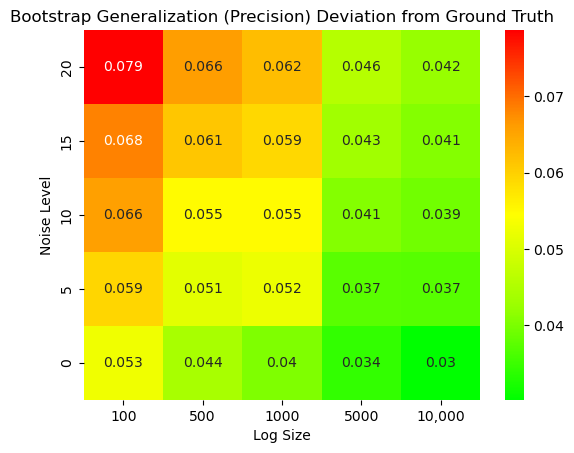

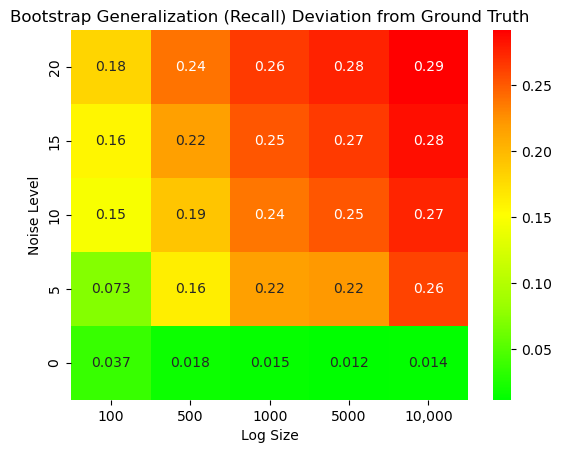

In [13]:
# V3 weighted - paper
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 4/src/main/java/org/bootstrap/resources/log0/oa/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_0.svg', format='svg')

plt.show()

0.9999999999999989
0.7865866835474045
0.6303976484557369
0.5958240307497138
0.5316490665401552
0.999999999999998
0.5316490665401526
0.531649066540154
0.4933553379663358
0.49335533796633585
1.0000000000000018
0.4933553379663357
0.4933553379663345
0.4933553379663361
0.4933553379663358
0.9999999999999948
0.49335533796633535
0.493355337966335
0.49335533796633446
0.49335533796633446
1.0000000000000007
0.49335533796633535
0.4933553379663356
0.4933553379663359
0.493355337966335
[0.9999999999999989, 0.7865866835474045, 0.6303976484557369, 0.5958240307497138, 0.5316490665401552]
[0.999999999999998, 0.5316490665401526, 0.531649066540154, 0.4933553379663358, 0.49335533796633585]
[1.0000000000000018, 0.4933553379663357, 0.4933553379663345, 0.4933553379663361, 0.4933553379663358]
[0.9999999999999948, 0.49335533796633535, 0.493355337966335, 0.49335533796633446, 0.49335533796633446]
[1.0000000000000007, 0.49335533796633535, 0.4933553379663356, 0.4933553379663359, 0.493355337966335]
0.8673107093578427

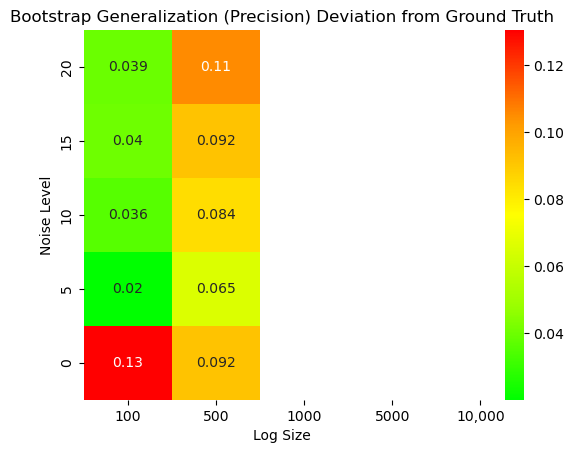

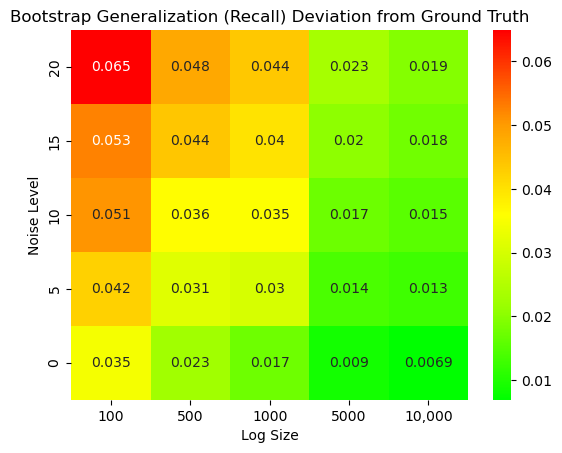

In [14]:
# V4 weighted - paper
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 4/src/main/java/org/bootstrap/resources/log0/oa/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[0])
                    recall = float(row[1])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)
    
# ground truth
csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/Log0/OmitActivity/ground_truth.csv"
temp = []
with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        temp.append(float(row[1]))
    
for row in temp:
    print(row)

prec_truth = []
for i in range(0, 5):
    row = []
    for j in range(0, 5):
        index = i * 5 + j
        row.append(temp[index])
    prec_truth.append(row)
    
for row in prec_truth:
    print(row)
    
real_prec_t = [[row[i] for row in prec_truth] for i in range(len(prec_truth[0]))]

# real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
# real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for i in range(0, 5):
    precision_row = []
    for j in range(0, 2):
        precision_row.append(abs(data_precision_0[i][j] - real_prec_t[i][j]))
    deviation_precision_0.append(precision_row)
    
# for row in data_precision_0:
#     precision_row = []
#     for value in row:
#         precision_row.append(abs(value - real_precision))
#     deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - 1))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_0.svg', format='svg')

plt.show()

[0.7744642984337646, 0.8001870777898112, 0.8117404563755124]
[0.7613355504357702, 0.7887958919435982, 0.793181585650568]
[0.747208643675283, 0.7821458505345426, 0.7866811298069225]
[0.7329814329145605, 0.7735084798043959, 0.7806829657587281]
[0.7189733652811034, 0.7662127439931543, 0.7747102814140032]
[0.8540037071093289, 0.8605619895419768, 0.8656225985039449]
[0.7446873761840241, 0.6784914899814586, 0.635164343578253]
[0.6784520845221368, 0.6539012114712749, 0.6090830013054884]
[0.6517856954302634, 0.6210030679742415, 0.5953098704220526]
[0.6220444649841933, 0.6024645938381312, 0.5785726721408255]
0.8673107093578427
0.8673107114012673
[[0.09284641092407808, 0.06712363156803147, 0.055570252982330315], [0.10597515892207254, 0.07851481741424449, 0.07412912370727476], [0.12010206568255977, 0.08516485882330016, 0.0806295795509202], [0.1343292764432822, 0.09380222955344686, 0.08662774359911463], [0.14833734407673926, 0.1010979653646884, 0.09260042794383949]]
[[0.013307004291938318, 0.00674

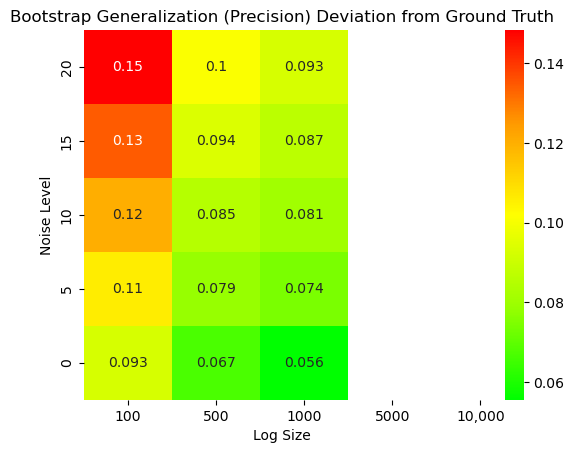

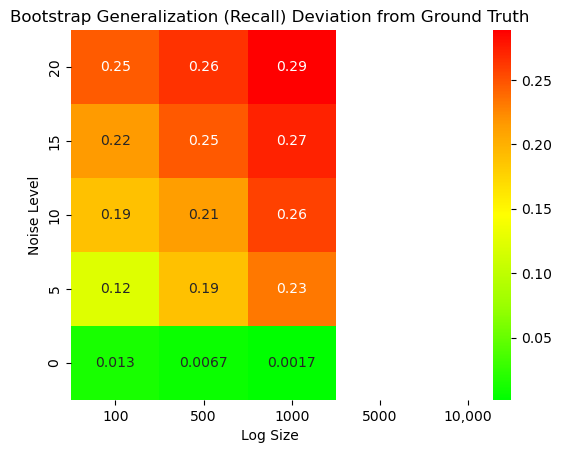

In [40]:
# V3 - Basic
log_sizes = [100, 500, 1000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 3/src/main/java/org/bootstrap/resources/log0/oa/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels)

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_0.svg', format='svg')

plt.show()

In [38]:
logSizes = ['100', '500', '1000', '5000', '10000']
for logSize in logSizes: 
    for noise in noises:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 4/src/main/java/org/bootstrap/resources/log0/ooo/output-" + logSize + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        print (recall_sum/num_rows)

0.8980290842086522
0.7699855876774211
0.7063448985693798
0.6720253731879763
0.6641644653601133
0.8850207128563643
0.6943354204555297
0.6323727861741992
0.6000883082903122
0.5720311111704269
0.8808150581982774
0.5997171332041704
0.5773139649556314
0.5566423378353434
0.5397683130217317
0.8793302588321158
0.5919917742595232
0.5753597793225415
0.5524379529182686
0.5427450289248771
0.8808217321237466
0.567473324711042
0.5520911198558651
0.5405982929822918
0.5287906861108193


In [42]:
file = "/Users/anandik/Downloads/bresults.csv"
# row_num = 0
with open(file, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
#         if (row_num > 24):
        print(row[1])
#         row_num = row_num + 1

0.999999999999998
0.786586683547407
0.6303976484557371
0.5958240307497159
0.5316490665401538
1.0000000000000029
0.5316490666302668
0.5316490665401549
0.49335533796633624
0.493355337966335
0.9999999999999976
0.49335533796633524
0.4933553379663351
0.4933553379663354
0.49335533796633446
1.0000000000000004
0.49335533796633574
0.49335533796633585
0.4933553379663347
0.493355337966335
1.0000000000000024
0.49335533796633607
0.49335533796633574
0.49335533796633596
0.4933553379663368
1.0
0.6575076378673588
0.5773783032969731
0.48488777546369344
0.46694725941977033
1.0000000000000018
0.35271641216546407
0.3065110681868704
0.28171570190920237
0.26557873074609767
1.0000000000000022
0.26557873074609806
0.2577169796353968
0.2469722087562578
0.2439137753509775
1.0000000000000002
0.2439137760071905
0.23150840167943834
0.21300423958333536
0.2069808865524569
0.9999999999999979
0.20698088654451927
0.1819266451579537
0.16478050857838383
0.1575784769999305
0.999999999999997
0.5288146673732759
0.405275491329

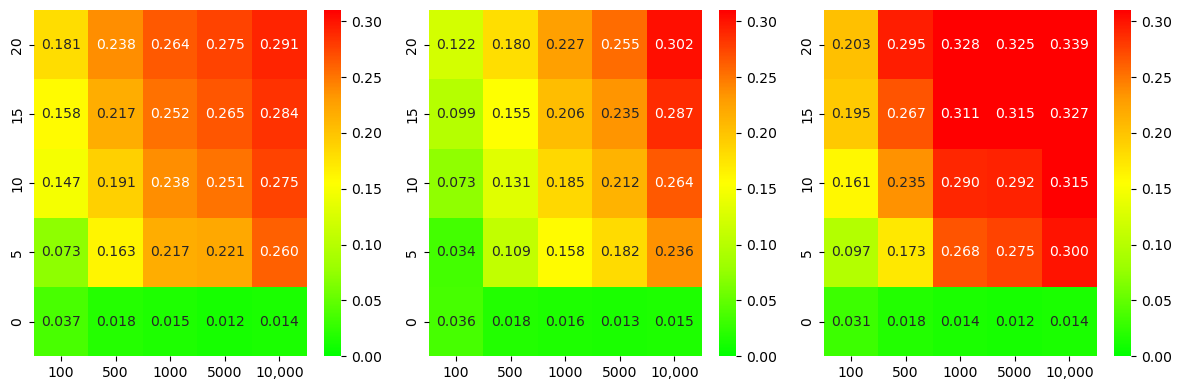

In [47]:
excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'weighted-analyze'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

num_heatmaps = 3

heatmap_rows = 5
heatmap_cols = 5

data_per_heatmap = heatmap_rows * heatmap_cols

if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

df2 = df['wbRecConstErr']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes = axes.flatten()

for i in range(num_heatmaps):
    data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.31, fmt='.3f')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

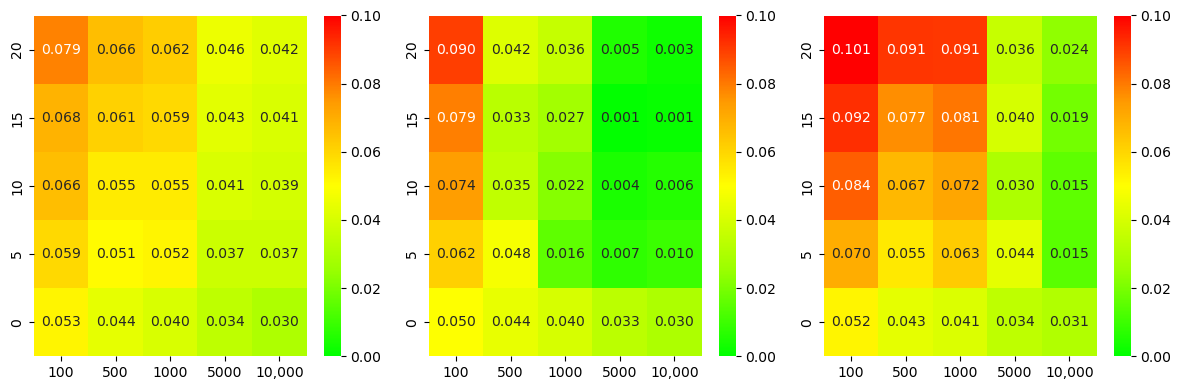

In [48]:
excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'weighted-analyze'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

num_heatmaps = 3

heatmap_rows = 5
heatmap_cols = 5

data_per_heatmap = heatmap_rows * heatmap_cols

if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

df2 = df['wbPrecConstErr']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes = axes.flatten()

for i in range(num_heatmaps):
    data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.1, fmt='.3f')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()